## Observations and Insights 

In [94]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview

mouse_study


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [95]:
# Checking the number of mice.
unique_mice = mouse_study["Mouse ID"].unique()
mouseID_counts = mouse_study["Mouse ID"].value_counts()
total_mice = len(unique_mouseID)
mouseID_counts


g989    13
c832    10
c402    10
l700    10
s508    10
        ..
h428     1
o848     1
u153     1
d133     1
f932     1
Name: Mouse ID, Length: 249, dtype: int64

In [96]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse = mouse_study.loc[mouse_study['Mouse ID'] == "g989"]


In [97]:
# Optional: Get all the data for the duplicate mouse ID. 



In [98]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_ID_index = mouse_study.set_index('Mouse ID')

clean_mouse_study = mouse_ID_index.drop(['g989']).reset_index()

clean_mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [99]:
# Checking the number of mice in the clean DataFrame.

clean_mouse_study['Mouse ID'].value_counts()


c832    10
c402    10
l700    10
s508    10
a897    10
        ..
h428     1
o848     1
u153     1
d133     1
f932     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [100]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean_data = clean_mouse_study.groupby(['Drug Regimen']).mean()
median_data = clean_mouse_study.groupby(['Drug Regimen']).median()
dev_data = clean_mouse_study.groupby(['Drug Regimen']).std()
sem_data = clean_mouse_study.groupby(['Drug Regimen']).sem()
var_data = clean_mouse_study.groupby(['Drug Regimen']).var()

mean_tumor = mean_data["Tumor Volume (mm3)"]
median_tumor = median_data["Tumor Volume (mm3)"]
dev_tumor = dev_data["Tumor Volume (mm3)"]
sem_tumor = sem_data["Tumor Volume (mm3)"]
var_tumor = var_data["Tumor Volume (mm3)"]

regimen_summary = pd.DataFrame({"Mean Tumor Volume(mm3)": mean_tumor, 
                              "Median Tumor Volume(mm3)": median_tumor, 
                              "St.Dev Tumor Volume": dev_tumor, 
                               "SEM Tumor Volume": sem_tumor, 
                               "Variance Tumor Volume": var_tumor})

regimen_summary
    
    





,Mean Tumor Volume(mm3),Median Tumor Volume(mm3),St.Dev Tumor Volume,SEM Tumor Volume,Variance Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346,24.947764
Ceftamin,52.591172,51.776157,6.268188,0.469821,39.290177
Infubinol,52.884795,51.820584,6.567243,0.492236,43.128684
Ketapril,55.235638,53.698743,8.279709,0.603860,68.553577
Naftisol,54.331565,52.509285,8.134708,0.596466,66.173479
Placebo,54.033581,52.288934,7.821003,0.581331,61.168083
Propriva,52.320930,50.446266,6.622085,0.544332,43.852013
Ramicane,40.216745,40.673236,4.846308,0.320955,23.486704
Stelasyn,54.233149,52.431737,7.710419,0.573111,59.450562


In [101]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

regimen_summary2 = clean_mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean',
                                                                                          'median', 'std', 
                                                                                          'sem', 'var'])
regimen_summary2


,mean,median,std,sem,var
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346,24.947764
Ceftamin,52.591172,51.776157,6.268188,0.469821,39.290177
Infubinol,52.884795,51.820584,6.567243,0.492236,43.128684
Ketapril,55.235638,53.698743,8.279709,0.603860,68.553577
Naftisol,54.331565,52.509285,8.134708,0.596466,66.173479
Placebo,54.033581,52.288934,7.821003,0.581331,61.168083
Propriva,52.320930,50.446266,6.622085,0.544332,43.852013
Ramicane,40.216745,40.673236,4.846308,0.320955,23.486704
Stelasyn,54.233149,52.431737,7.710419,0.573111,59.450562


## Bar and Pie Charts

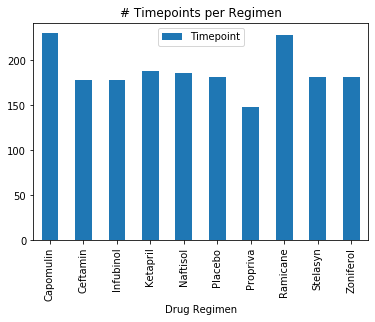

In [118]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

regimen_timepoints = clean_mouse_study.groupby(['Drug Regimen'])["Timepoint"].count()
regimen_timepoints_df = pd.DataFrame(regimen_timepoints)
regimen_timepoints_df.plot(kind='bar', title="# Timepoints per Regimen")


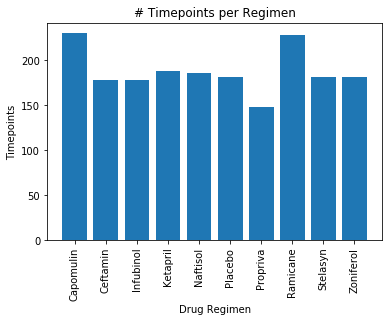

In [121]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

    
plt.bar(regimen_timepoints_df.index, regimen_timepoints_df["Timepoint"], align="center")
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.title("# Timepoints per Regimen")
plt.show()

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
